#YOLOv8 (You Only Look Once, versión 8)
####Para esta actividad utilizaremos YOLO, una red neuronal de última generación muy popular y efectiva para la detección de objetos en tiempo real. Ultralytics, la empresa detrás de YOLO, proporciona modelos pre-entrenados que podemos usar facilmente, como lo podemos ver en el siguiente codigo:

In [ ]:
#Instalación de la librería Ultralytics
!pip install ultralytics

Modelo yolov8n.pt cargado exitosamente.

0: 416x640 7 persons, 1 frisbee, 1 bottle, 9 cups, 1 bowl, 2 dining tables, 154.8ms
Speed: 3.3ms preprocess, 154.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


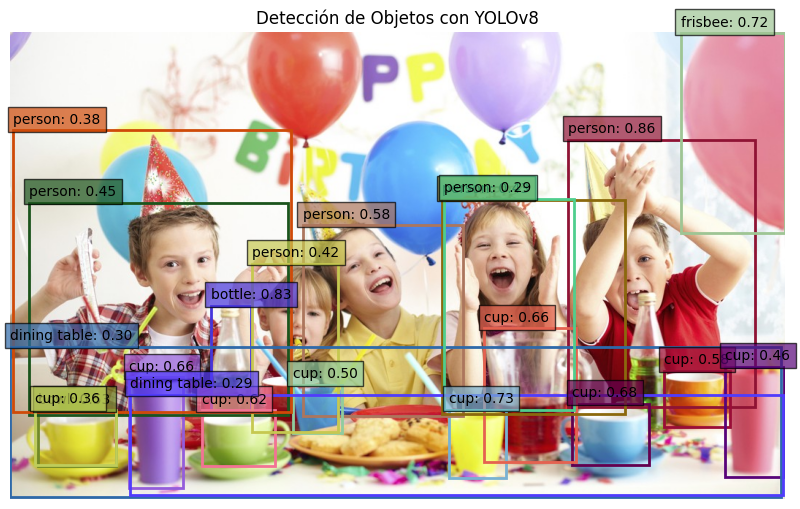


0: 384x640 2 persons, 1 tie, 131.1ms
Speed: 2.4ms preprocess, 131.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


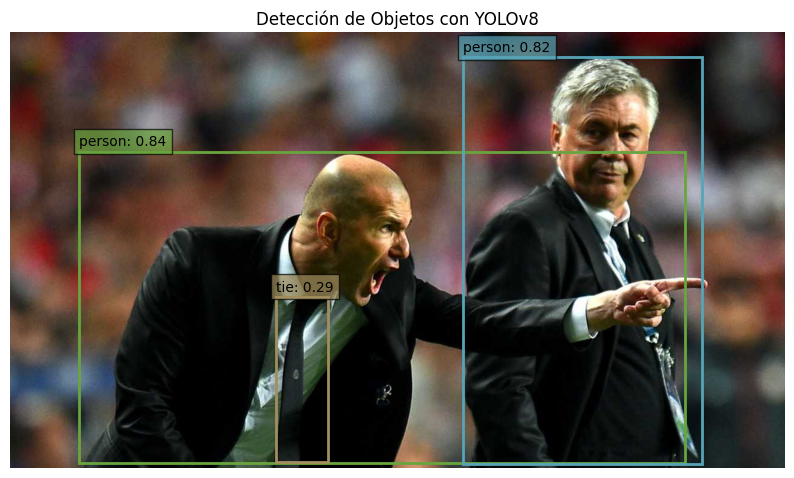


0: 512x640 1 bicycle, 197.2ms
Speed: 4.7ms preprocess, 197.2ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


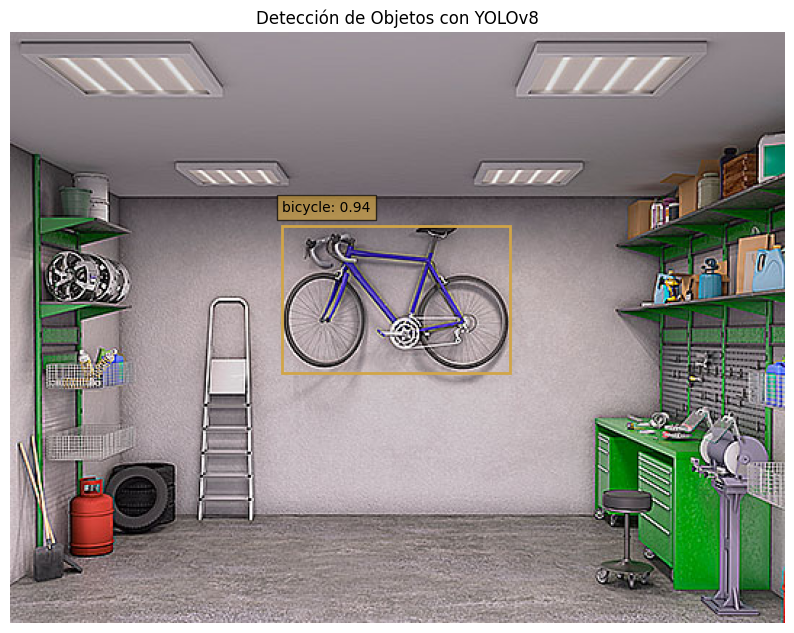

In [4]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

#Carga del modelo pre-entrenado
modelo_nombre = 'yolov8n.pt'
modelo = YOLO(modelo_nombre)
print(f"Modelo {modelo_nombre} cargado exitosamente.")

#Función para realizar la detección y visualizar resultados
def detectar_y_visualizar(ruta_imagen=None, url_imagen=None):
    if ruta_imagen:
        try:
            imagen = Image.open(ruta_imagen).convert('RGB')
        except FileNotFoundError:
            print(f"Error: No se encontró la imagen en la ruta: {ruta_imagen}")
            return
    elif url_imagen:
        try:
            response = requests.get(url_imagen)
            response.raise_for_status()
            imagen = Image.open(BytesIO(response.content)).convert('RGB')
        except requests.exceptions.RequestException as e:
            print(f"Error al descargar la imagen desde la URL: {url_imagen} - {e}")
            return
        except Exception as e:
            print(f"Error al abrir la imagen desde la URL: {url_imagen} - {e}")
            return
    else:
        print("Por favor, proporciona una ruta de imagen local o una URL.")
        return

    resultados = modelo(imagen)

    # Visualización de los resultados con Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(np.array(imagen))
    ax = plt.gca()

    for objetos in resultados:
        for *caja, confianza, clase in objetos.boxes.data.tolist():
            x1, y1, x2, y2 = map(int, caja)
            ancho = x2 - x1
            alto = y2 - y1
            nombre_clase = objetos.names[int(clase)]
            etiqueta = f"{nombre_clase}: {confianza:.2f}"
            color = [np.random.randint(0, 255) / 255 for _ in range(3)]  # Color aleatorio para cada clase
            ax.add_patch(plt.Rectangle((x1, y1), ancho, alto, linewidth=2, edgecolor=color, facecolor='none'))
            plt.text(x1, y1 - 10, etiqueta, fontsize=10, bbox=dict(facecolor=color, alpha=0.7))

    plt.title("Detección de Objetos con YOLOv8")
    plt.axis('off')
    plt.show()

#Prueba con una imagen local
nombre_archivo_local = 'fiesta.jpg' #@param {type:"string"}
if nombre_archivo_local:
    detectar_y_visualizar(ruta_imagen=nombre_archivo_local)

#Pruebas con una URL de imagen
url_imagen_ejemplo = 'https://ultralytics.com/images/zidane.jpg' #@param {type:"string"}
detectar_y_visualizar(url_imagen=url_imagen_ejemplo)

url_imagen_ejemplo2 = 'https://serveiestacio.com/blog/wp-content/uploads/2022/03/garaje-iluminado.jpg' #@param {type:"string"}
detectar_y_visualizar(url_imagen=url_imagen_ejemplo2)
